# Insurance Cost Analysis

## Preperation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
df = pd.read_csv("insurance.csv", header = None)

In [3]:
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [4]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [5]:
df.replace("?", np.nan, inplace = True)

In [6]:
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,NaN,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


## Data Processing

In [7]:
df.info()
# age (continous) and smoker (categorical) has missing values.
# charges decimal round for simplicity

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [8]:
mean_age = df["age"].astype("float").mean(axis = 0)
df["age"] = df["age"].replace(np.nan, mean_age)

frequent_smoker = df["smoker"].value_counts().idxmax()
df["smoker"] = df["smoker"].replace(np.nan, frequent_smoker)

df[["age","smoker"]] = df[["age","smoker"]].astype("int")

df["charges"] = np.round(df[["charges"]],2)
print(df.head())

   age  gender     bmi  no_of_children  smoker  region   charges
0   19       1  27.900               0       1       3  16884.92
1   18       2  33.770               1       0       4   1725.55
2   28       2  33.000               3       0       4   4449.46
3   33       2  22.705               0       0       1  21984.47
4   32       2  28.880               0       0       1   3866.86


## Exploratory Data Analysis

In [9]:
df.corr()
# strong positive correlation with charges and smoker
# weak positive correlation with charges and bmi

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


(0.0, 66902.85800000001)

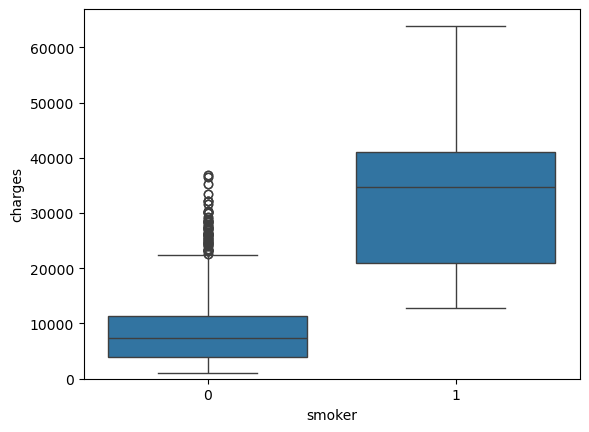

In [10]:
sns.boxplot(x = "smoker", y = "charges", data = df)
plt.ylim(0,)

# smokers tend to have more insurance charges than non-smokers, can be a good estimator for charges.

(0.0, 66902.85800000001)

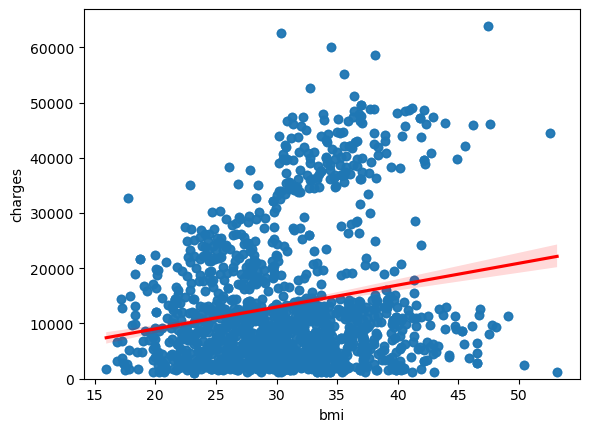

In [11]:
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

## Model Development

In [12]:
lr = LinearRegression()

X = df[["smoker"]]
Y = df[["charges"]]

lr.fit(X, Y)
print(lr.score(X, Y))
# R^2 value indicates us that we can explain the variation in charges approximately 62% with smoker variable

0.6221791733924185


In [13]:
ind_var = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lr.fit(ind_var,Y)
print(lr.score(ind_var, Y))
# even though correlations are not strong, adding other independent variables improves our model, which is logical

0.7504083820289634


In [14]:
Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures()), ("model", LinearRegression())]
Pipe = Pipeline(Input)
ind_var = ind_var.astype(float)

Pipe.fit(ind_var, Y)
yhatpipe = Pipe.predict(ind_var)
print(r2_score(Y,yhatpipe))
# we can improve the model using polynomial features with different degrees

0.8452285912902487


In [ ]:
# since we are working on in sample , we expect R^2 increases as poly degree increases
poly_degree = [1,2,4,8,10]
for deg in poly_degree:
    Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(deg)), ("model", LinearRegression())]
    Pipe = Pipeline(Input)
    ind_var = ind_var.astype(float)

    Pipe.fit(ind_var, Y)
    yhatpipe = Pipe.predict(ind_var)
    # as degree increases, R^2 increases too but it may cause overfitting so also should check that too with cross validation
    scores = cross_val_score(Pipe, ind_var, Y, cv = 5, scoring="r2")
    print(f"Degree {deg}: R^2 Train = {r2_score(Y, yhatpipe):.4f}, R^2 CV Mean = {scores.mean():.4f}")

Degree 1: R^2 Train = 0.7504, R^2 CV Mean = 0.7494
Degree 2: R^2 Train = 0.8452, R^2 CV Mean = 0.8427
Degree 4: R^2 Train = 0.8664, R^2 CV Mean = 0.8531
Degree 8: R^2 Train = 0.9567, R^2 CV Mean = 0.9464


## Model Refinement

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(ind_var, Y, test_size = 0.2, random_state = 1)
# as rule of thumb,20/80 used in here

In [ ]:
alpha = 0.1 # also can be change for an optimal value
RidgeModel = Ridge(alpha)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

In [ ]:
poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test) # since we dont want data leakage to training ftom test, we use transform not fit_transform method
RidgeModel.fit(x_train_poly, y_train)
yhat_poly_ridge = RidgeModel.predict(x_test_poly)
print(r2_score(y_test, yhat_poly_ridge))
# our model can describes the variation in charges approximately 80% with age, gender, bmi, no_of_children, smoker and region